In [106]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import wget as wget
import plotly.graph_objects as go
%matplotlib inline

,TGS 2610 (mV),TGS 2602 (mV),TGS 2620 (mV),TGS 2600 (mV),TGS 2611(mV),kelas
0,872.2,1837.5,2464.7,1661.1,1029.0,1
1,882.0,1773.8,2391.2,1646.4,1014.3,1
2,877.1,1675.8,2288.3,1617.0,1019.2,1
3,862.4,1553.3,2219.7,1563.1,1019.2,1
4,852.6,1445.5,2141.3,1523.9,1009.4,1


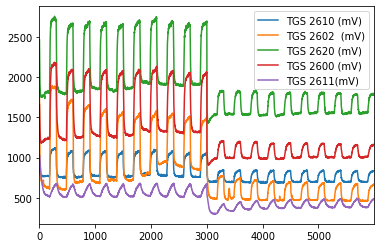

In [107]:
names = ['TGS 2610(mV)' , 'TGS 2602(mV)' , 'TGS 2620 (mV)','TGS 2600 (mV)','TGS 2611 (mV)','class']
datasensor = pd.read_csv('data-sensor-tgs-bisa.csv',sep=',')
datasensor.drop('kelas',axis=1).plot()
datasensor.head()

In [108]:
cycles = np.arange(0,6001,300)

label = []
target = []

KlasciriMean = []
KlasciriVar  = []
KlasciriDiff = []
KlasciriIntg = []
KlasciriRel  = []
KlasciriFrac = []

for i in range(len(cycles)):
    if i==0:
        continue
    j=i-1
    
    data = datasensor.iloc[cycles[j]+1:cycles[j+1]]
    
    string = str(cycles[j]+1) + '-' + str(cycles[j+1])
    label.append(string)
    
    target.append(int(data.kelas.head(1)))
    data = data.drop('kelas', axis=1)
    
    KlasciriMean.append(data.mean())
    KlasciriVar.append(data.var())
    KlasciriDiff.append(data.max() - data.min())
    KlasciriIntg.append(data.sum())
    KlasciriRel.append(data.max() / data.min())
    KlasciriFrac.append((data.max()-data.min()) / data.min())

In [109]:
#MEAN
mean_ = pd.DataFrame(KlasciriMean, index=label)
mean_.columns = mean_.columns + '_mean'
#VARIANCE
var_ = pd.DataFrame(KlasciriVar, index=label)
var_.columns = var_.columns + '_variance'
#DIFFERENCE
diff_ = pd.DataFrame(KlasciriDiff, index=label)
diff_.columns = diff_.columns + '_difference'
#INTEGRAL
intg_ = pd.DataFrame(KlasciriIntg, index=label)
intg_.columns = intg_.columns + '_integral'
#RELATIVE
rel_ = pd.DataFrame(KlasciriRel, index=label)
rel_.columns = rel_.columns + '_relative'
#FRACTIONAL
frac_ = pd.DataFrame(KlasciriFrac, index=label)
frac_.columns = frac_.columns + '_fractiom'

In [110]:
features = pd.concat([mean_, var_, diff_, intg_, rel_, frac_], axis=1)
features = pd.concat([features, pd.DataFrame(target, index=label)], axis=1)
features.rename(columns={0: 'target'}, inplace=True)

In [111]:
print(features.head(3))

         TGS 2610 (mV)_mean  TGS 2602  (mV)_mean  TGS 2620 (mV)_mean  \
1-300            893.635452          1125.852843         2141.037793   
301-600          873.609365          1026.459866         2129.336789   
601-900          875.215385          1050.714047         2141.168896   

         TGS 2600 (mV)_mean  TGS 2611(mV)_mean  TGS 2610 (mV)_variance  \
1-300           1559.101338         617.711371            23373.980484   
301-600         1557.183946         568.203344            19498.155550   
601-900         1562.411706         569.317726            19925.461440   

         TGS 2602  (mV)_variance  TGS 2620 (mV)_variance  \
1-300              321691.105252           186043.591419   
301-600            248058.642142           143237.031125   
601-900            185635.115305           143997.460070   

         TGS 2600 (mV)_variance  TGS 2611(mV)_variance  ...  \
1-300             183867.200871           13161.814098  ...   
301-600           138497.506923            2865

In [112]:
features.index = np.arange(0,20)

In [113]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(features.drop('target', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [114]:
scaled_features = scaler.transform(features.drop('target',axis=1))

In [115]:
df_feat = pd.DataFrame(scaled_features,columns=features.columns[:-1])

In [116]:
print(df_feat.head())

   TGS 2610 (mV)_mean  TGS 2602  (mV)_mean  TGS 2620 (mV)_mean  \
0            1.213076             1.207904            0.888820   
1            0.914384             0.824844            0.845304   
2            0.938338             0.918320            0.889308   
3            1.052975             0.826423            0.968538   
4            0.831767             0.822571            0.899608   

   TGS 2600 (mV)_mean  TGS 2611(mV)_mean  TGS 2610 (mV)_variance  \
0            0.922737           1.436269                1.689916   
1            0.915416           0.883928                1.173292   
2            0.935375           0.896361                1.230249   
3            0.994002           0.959439                0.899043   
4            0.924489           0.888316                0.901285   

   TGS 2602  (mV)_variance  TGS 2620 (mV)_variance  TGS 2600 (mV)_variance  \
0                 2.684935                1.831361                1.978492   
1                 1.865481            

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_features,features['target'],test_size=0.10, shuffle=True)

In [118]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(x_train)
x_pca = pca.transform(x_train)
x_pca_test = pca.transform(x_test)

In [119]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train,y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [120]:
y_pred = classifier.predict(x_test)

In [121]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1 0]
 [0 1]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [122]:
knn_pca = KNeighborsClassifier(n_neighbors = 3)
knn_pca.fit(x_train_pca,y_train)
y_pred_pca = knn_pca.predict(x_test_pca)
print(classification_report(y_test,y_pred_pca))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



Text(1, 0, 'Label 1')

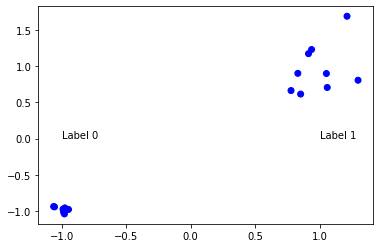

In [123]:
colormap = np.array(['green', 'blue'])

plt.scatter(x_train[:,0], x_train[:,5], c=colormap[np.array(y_train)])
plt.text(-1, 0, 'Label 0')
plt.text( 1, 0, 'Label 1')

Text(1, 0, 'Label 1')

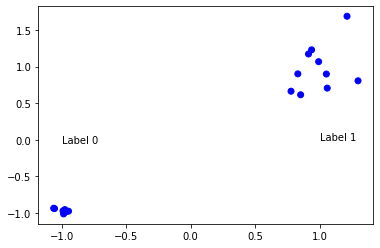

In [124]:
colormap = np.array(['green', 'blue'])

plt.scatter(x_train_pca[:,0], x_train_pca[:,5], c=colormap[np.array(y_train)])
plt.text(-1, -0.05, 'Label 0')
plt.text( 1, 0, 'Label 1')

In [125]:
knn.predict(x_pca_test[:,[0,4]])

array([ 1, -1], dtype=int64)

In [126]:
knn.predict(x_pca[:,[0,4]])

array([ 1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1, -1,  1,
       -1], dtype=int64)

In [127]:
y_test

5     1
12   -1
Name: target, dtype: int64

In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [148]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [149]:
y_pred = classifier.predict(x_test)

In [153]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1 0]
 [0 1]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [155]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 18, n_neighbors = 19